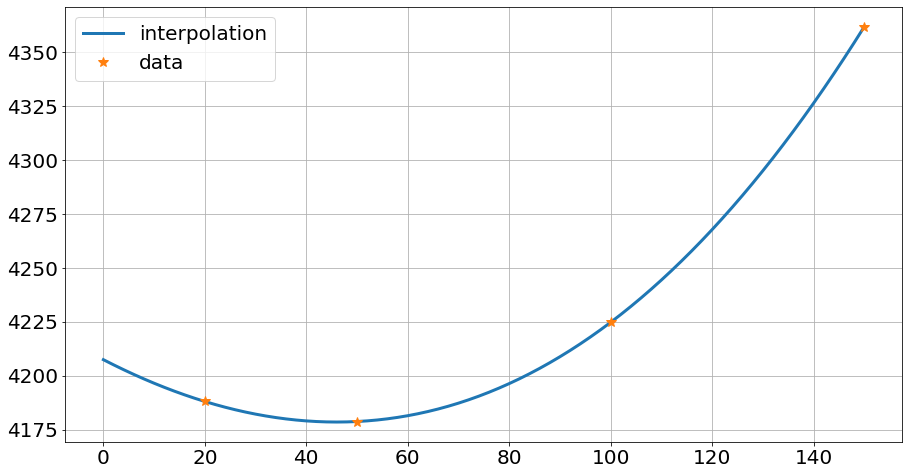

interpolation valaue : 4267.6888461538465
percent error : 0.18048934633442482


In [77]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size': 20})

t = np.array([20,50,100,150])
c = np.array([4188.0,4178.7,4224.7,4361.8])

def coeffts(xData,yData):
    m = len(xData)  # Number of data points
    a = yData.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
    return a

def evalPoly(a,xData,x):
    n = len(xData) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p

xx = np.arange(0,151,1)
an = coeffts(t,c)
poly = evalPoly(an,t,xx)
plt.plot(xx,poly,lw=3,label='interpolation')
plt.plot(t,c,'*',ms=10,label='data')
plt.grid()
plt.legend()
plt.show()
c_120 = evalPoly(an,t,120)
c_theory = 4260.
print('interpolation valaue :',c_120)
print('percent error :',(c_120-c_theory)/c_theory*100)

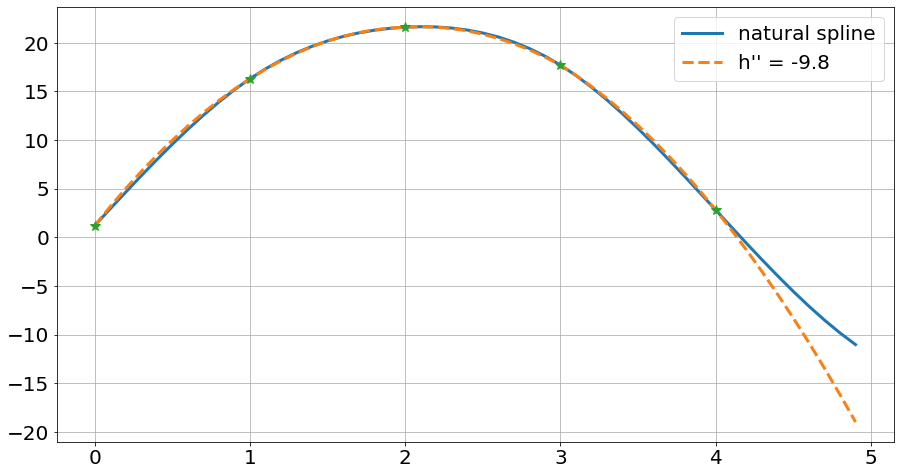

[  0.         -12.98571429  -6.85714286 -14.78571429   0.        ]


In [59]:
# 2-1

import numpy as np
import matplotlib.pyplot as plt

def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam    
    return c,d,e

def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]    
    return b

def curvatures(xData,yData):
    n = len(xData) - 1
    c = np.zeros(n)
    d = np.ones(n+1)
    e = np.zeros(n)
    k = np.zeros(n+1)
    c[0:n-1] = xData[0:n-1] - xData[1:n]
    d[1:n] = 2.0*(xData[0:n-1] - xData[2:n+1])
    e[1:n] = xData[1:n] - xData[2:n+1]
    k[1:n] =6.0*(yData[0:n-1] - yData[1:n])/(xData[0:n-1] - xData[1:n]) \
            - 6.0*(yData[1:n] - yData[2:n+1])/(xData[1:n] - xData[2:n+1])
    LUdecomp3(c,d,e)
    LUsolve3(c,d,e,k)   
    return k

def evalSpline(xData,yData,k,x):
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft) <= 1: return iLeft
            i =(iLeft + iRight)//2
            if x < xData[i]: iRight = i
            else: iLeft = i
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 \
            - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0   \
            + (yData[i]*(x - xData[i+1])                            \
            - yData[i+1]*(x - xData[i]))/h
    return y

t = np.array([0,1,2,3,4])
h = np.array([1.2,16.3,21.6,17.7,2.8])

k = curvatures(t,h)

ev=[]
xx = np.arange(0,5,0.1)
for i in xx:
    ev.append(evalSpline(t,h,k,i))
    
kp=-9.8*np.ones(5)
evp=[]
for i in xx:
    evp.append(evalSpline(t,h,kp,i))


plt.plot(xx,ev,linewidth=3,label='natural spline')    # 자연스플라인
plt.plot(xx,evp,'--',linewidth=3,label='h\'\' = -9.8')
plt.plot(t,h,'*',markersize=10)
plt.grid()
plt.legend()
plt.show()

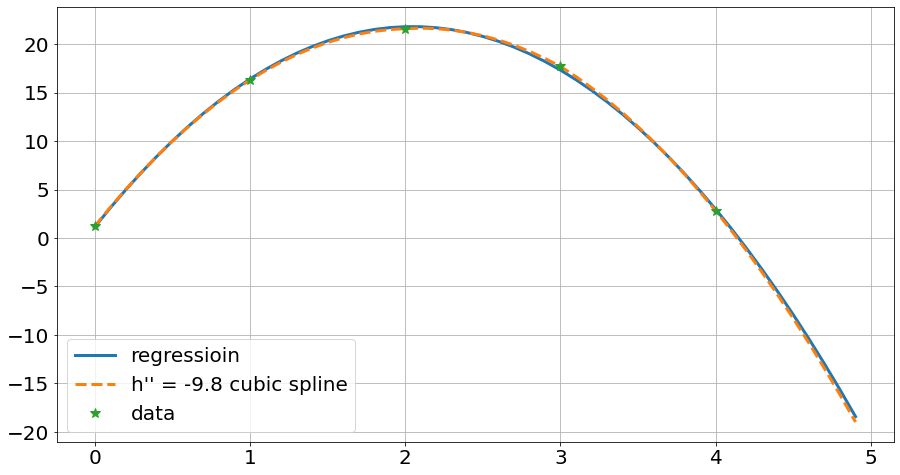


2차함수 회귀분석의 경우가 2-1의 자연스플라인보다는 정확한 것 같다.
h''을 -9.8로 둔 큐빅 스플라인이 가장 정확한 것 같다.



In [68]:
# 2-2

cf = np.polyfit(t,h,2)    # xData, yData, degree
ffun = np.poly1d(cf)
plt.plot(xx,ffun(xx),lw=3,label='regressioin')   
plt.plot(xx,evp,'--',linewidth=3,label='h\'\' = -9.8 cubic spline')
plt.plot(t,h,'*',label='data',ms=10)
plt.grid()
plt.legend()
plt.show()

print('''
2차함수 회귀분석의 경우가 2-1의 자연스플라인보다는 정확한 것 같다.
h''을 -9.8로 둔 큐빅 스플라인이 가장 정확한 것 같다.
''')

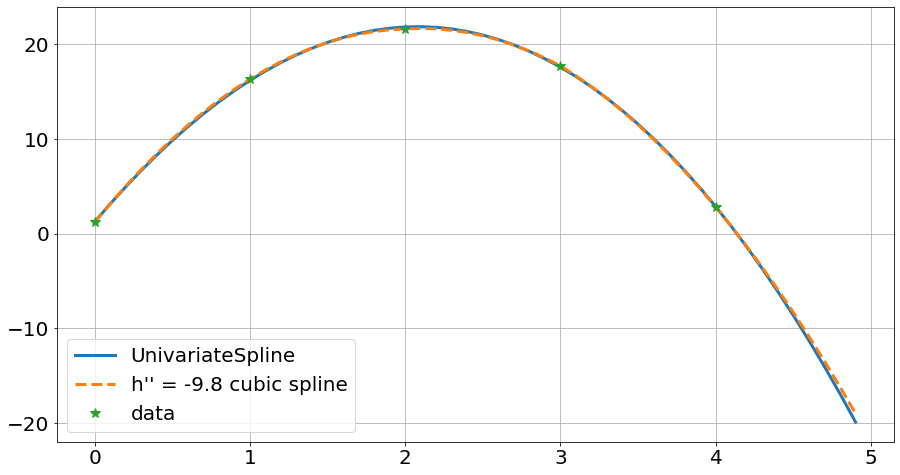

In [65]:
# 2-3

from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(t,h)

plt.plot(xx, spl(xx),lw=3,label='UnivariateSpline')
plt.plot(xx,evp,'--',linewidth=3,label='h\'\' = -9.8 cubic spline')
plt.plot(t,h,'*',label='data',ms=10)
plt.grid()
plt.legend()
plt.show()

In [72]:
# 3

print('''
3-1
보간법은 데이터를 모두 지나가는 함수를 찾는것이고 
회귀분석은 데이터와 가장 비슷한 함수를 찾는것이라 데이터를 지나지 않을 수도 있다.

3-2
스플라인 보간법은 전체 구간을 나누어서 낮은차수의 다항식들을 합치는 보간법이고 
다항식 보간법은 하나의 다항식으로 하는 보간법이다. 다항식 보간법은 데이터의 개수가 늘어나면 차수가 늘어난다.

''')


3-1
보간법은 데이터를 모두 지나가는 함수를 찾는것이고 
회귀분석은 데이터와 가장 비슷한 함수를 찾는것이라 데이터를 지나지 않을 수도 있다.

3-2
스플라인 보간법은 전체 구간을 나누어서 낮은차수의 다항식들을 합치는 보간법이고 
다항식 보간법은 하나의 다항식으로 하는 보간법이다. 다항식 보간법은 데이터의 개수가 늘어나면 차수가 늘어난다.


